Data gathered for this project was collected from the below website, which was proposed in pdf instruction file: 
https://data.baltimorecity.gov/Public-Safety/BPD-Part-1-Victim-Based-Crime-Data/wsfq-mvij/data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches

%matplotlib inline

In [2]:
loc = "c:/VictimBasedCrimeData.csv"
crimeData = pd.read_csv(loc, low_memory=False)

The table included categories of data that were not useful for the analysis, so unwated columns were removed from the DataFrame

In [3]:
del crimeData['CrimeTime']
del crimeData['Location']
del crimeData['Location 1']
del crimeData['crimeCaseNumber']

The rows with empty values were removed from the DataFrame, because they included incomplete data. Deleted values will not cause adverse effects on the results.

In [4]:
cleanedData = crimeData.dropna()

Table rows are narrowed to 10000 and next null values are verified:

In [5]:
modifiedCrimeData = cleanedData.head(10000)

In [6]:
modifiedCrimeData.isnull().sum()

CrimeDate          0
CrimeCode          0
Description        0
Inside/Outside     0
Weapon             0
Post               0
District           0
Neighborhood       0
Longitude          0
Latitude           0
Premise            0
Total Incidents    0
dtype: int64

Cleaned data are saved as csv file. Next the file is loaded, table headers are added and data type of Post column is changed from float to integer 

In [7]:
modifiedCrimeData.to_csv('modifiedCrimeData.csv',index=False, header=None)

In [8]:
src = "modifiedCrimeData.csv"
crimeDataCleaned = pd.read_csv(src, names = ["CrimeDate", "CrimeCode", "Description", "Inside/Outside", "Weapon", "Post", "District", "Neighborhood", "Longitude", "Latitude", "Premise", "Total Incidents"], dtype={'Post':int}, low_memory=False)
crimeDataCleaned['Total Incidents'] = crimeDataCleaned['Total Incidents'].astype(int)
crimeDataCleaned['Post'] = crimeDataCleaned['Post'].astype(int)

Basic characteristics hardly apply directly to this particular data set as we will not be analyzing raw data. Directly below the .describe() function portrays this point of view by providing some basic insight into the data. This is most likely irrelevant to any conclusions deducted later on. Further below some characterics surface but that is after data is analyzed and aggregated.

In [9]:
crimeDataCleaned.describe()

,Post,Longitude,Latitude,Total Incidents
count,10000.000000,10000.000000,10000.000000,10000.0
mean,526.209000,-76.619154,39.305793,1.0
std,259.019679,0.042255,0.029277,0.0
min,111.000000,-76.711230,39.200410,1.0
25%,321.000000,-76.651558,39.288598,1.0
50%,513.000000,-76.614865,39.302975,1.0
75%,742.000000,-76.588200,39.325080,1.0
max,943.000000,-76.529850,39.371950,1.0


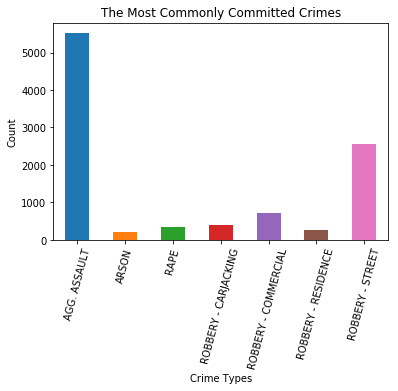

In [10]:
crimeDataCleaned.groupby('Description').size().plot(kind='bar')
plt.title('The Most Commonly Committed Crimes')
plt.rcParams["figure.figsize"] = [10,5]
plt.xlabel('Crime Types')
plt.ylabel("Count")
plt.xticks( rotation = 75 )
plt.show()

Data type of CrimeData column is changed from object to date type

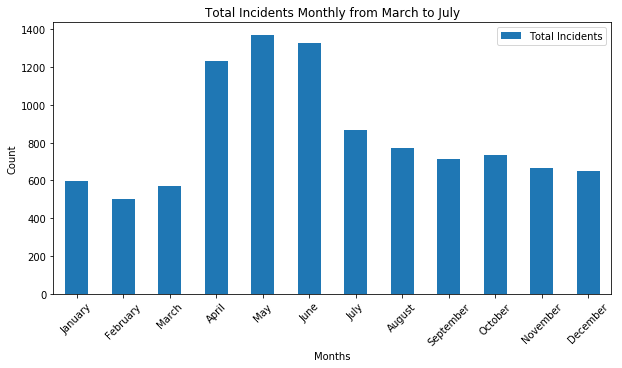

In [11]:
#crimeDataCleaned['CrimeDate'] = crimeDataCleaned['CrimeDate'].astype('datetime64[ns]')
crimeDataCleaned['CrimeDate'] = pd.to_datetime(crimeDataCleaned['CrimeDate'])
crimeDataCleaned[["Total Incidents"]].groupby((crimeDataCleaned["CrimeDate"].dt.month)).count().plot(kind='bar')
plt.title('Total Incidents Monthly from March to July')
plt.xlabel('Months')
plt.ylabel("Count")
plt.xticks( range(12), ("January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"), rotation = 45 )
plt.show()

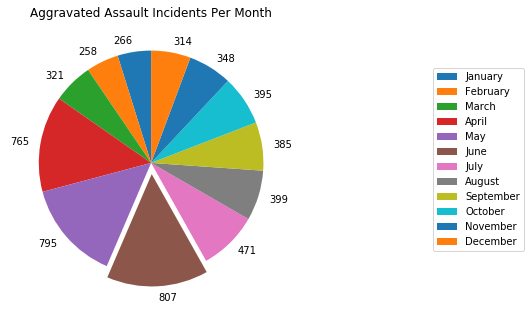

In [12]:
aggAssault = crimeDataCleaned[crimeDataCleaned['Description'] == 'AGG. ASSAULT']
groupData = aggAssault.groupby((crimeDataCleaned["CrimeDate"].dt.month)).count()

labelsList = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

plt.title('Aggravated Assault Incidents Per Month')
plt.pie(groupData['Total Incidents'],
       labels = groupData['Total Incidents'],
        explode=(0, 0, 0, 0, 0,0.1,0,0,0,0,0,0),
       startangle=90)
# plt.legend(labels = labelsList, loc = 4)

plt.legend(labelsList, bbox_to_anchor=(1,0.5), loc="center right", fontsize=10, 
           bbox_transform=plt.gcf().transFigure)
plt.subplots_adjust(left=0.0, bottom=0.1, right=0.95)

plt.show()

It is clear that the most commonly commited crimes are aggravated assault and street robbery. The global intensity of crime seems to visibly raise in the months of April through June and then starts a steady decline. Given the fact that the most popular offense is the aggravated assault it may seem that the spring months, supporting more activity and emotional outbursts, are related to the crime rise due to its nature. To support that claim it is also worth noticing that an overwhelming number of robberies is carried out on the street, rather than in a residence. This could also suggest that the changing of winter to summer and the fact that more people leave their houses is also a factor. Simply put, more people leave their houses, thus there is more opportunity for crime. It may be worth noticing, as well, that most aggravated assaults occur in June which is not the month in which most incidents occur, globally.

Text(0, 0.5, 'Number of Crimes')

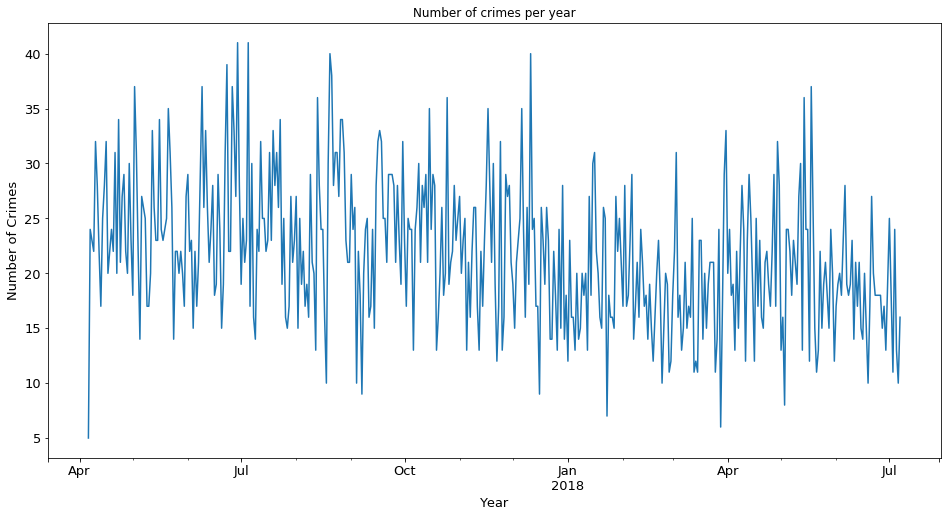

In [13]:
crimeDataGrouped= crimeDataCleaned.groupby('CrimeDate').size()
crimeDataGrouped.plot(title='Number of crimes per year',
                     fontsize=13, figsize=(16, 8))

plt.xlabel('Year',fontsize=13)
plt.ylabel('Number of Crimes',fontsize=13)

If we were analyzing crime over the course of months with the data we have we could potentially make a prediction whether the crime rate is going to be on the rise or not in the following months in the future. Based on the above chart it does seem like it would be slightly declining.

The data was acquired from a website. It was previously analyzed in terms of compliance with the constraints. Installed Anaconda Navigator as well as Jupyter Python. The data was cleaned up and saved into a new CSV file using Pandas. Data comparison and visualization was performed using Pandas in the Jupyter Python. Multiple diagrams were created supporting the claimed thesis.

During the course of the project I have learned the basics of data analytics and basics of Jupyter Python/Pandas usage for the purposes of said data analysis. Additionally I have learned how to aggregate and filter data so that it can be further processed and that it is compliant with the outlined constraints. I have created data analysis, visualizations and observations supported by usage of Pandax syntax which I have also learned. 